<a href="https://colab.research.google.com/github/MILLERASPRILLA/Proyecto--Churn-/blob/main/Calidad_Datos/Calidad_datos_Tesis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Universidad Central](https://www.ucentral.edu.co/sites/default/files/inline-images/identificadores-Centrados_en_ti_logo-h.png)

# __PROYECTO DE GRADO__

> ## ____ Implementación de modelos de aprendizaje de máquina para la prevención de la fuga de clientes en una empresa de telecomunicaciones.
>
>
> <br>
>
> ## __Contenido__

>**Temas:**

>> Preprocesamiento de los datos

>---


- Librerias

In [86]:
pip install sweetviz

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [87]:
import numpy as np
import pandas as pd
import seaborn as sns
import sweetviz
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns

# EXTRACCIÓN DE LOS DATOS 

In [88]:
DF = pd.read_csv("https://raw.githubusercontent.com/MILLERASPRILLA/Proyecto--Churn-/main/Bases/Base_original.csv", sep= ",", encoding= "latin1")
DF.shape

(7043, 21)

# PERFILADO DE DATOS

. En este proceso buscamos la detección de datos inesperados , incorrectos e inconsistentes 

- Para facilitar la comprensión de los datos renombraremos las columnas del Dataframe al idioma español

In [89]:
DF.columns = ["ID_CLIENTE", "GENERO", "ADULTO_MAYOR", "CASADO", "PERSONAS_A_CARGO", "MESES_COMO_CLIENTE", "TIENE_TELEFONIA", "VARIAS_LINEAS", 
              "TIPO_INTERNET", "SEGURIDAD_EN_LINEA", "COPIA_DE_SEGURIDAD", "PROTECCION_DISPOSITIVO", "SOPORTE_TECNICO", "SERVICIO_TV", 
              "SERVICIOS_STREAMING", "PERIODO_CONTRATO", "FACTURACION_ELECTRONICA", "METODO_PAGO","COBRO_MENSUAL",  "COBRO_TOTAL", "ABANDONO" ]
DF.head()

,ID_CLIENTE,GENERO,ADULTO_MAYOR,CASADO,PERSONAS_A_CARGO,MESES_COMO_CLIENTE,TIENE_TELEFONIA,VARIAS_LINEAS,TIPO_INTERNET,SEGURIDAD_EN_LINEA,...,PROTECCION_DISPOSITIVO,SOPORTE_TECNICO,SERVICIO_TV,SERVICIOS_STREAMING,PERIODO_CONTRATO,FACTURACION_ELECTRONICA,METODO_PAGO,COBRO_MENSUAL,COBRO_TOTAL,ABANDONO
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [90]:
# Inspección Inicial 
print("El DataFrame contiene", DF.shape[0], "Filas y", DF.shape[1], "columnas" )
columna = []
tipo = []
unicos = []
nulos = []
for col in DF.columns.to_list():
    columna.append(col)
    tipo.append(DF[col].dtype)
    unicos.append(len(DF[col].unique()))
    nulos.append(len(DF[DF[col].isnull()]))

    descripcion = pd.DataFrame(list(zip(columna, tipo, unicos, nulos)), 
                               columns = ["Columna", "Tipo_dato", "Unicos", "Nulos"])

descripcion

El DataFrame contiene 7043 Filas y 21 columnas


,Columna,Tipo_dato,Unicos,Nulos
0,ID_CLIENTE,object,7043,0
1,GENERO,object,2,0
2,ADULTO_MAYOR,int64,2,0
3,CASADO,object,2,0
4,PERSONAS_A_CARGO,object,2,0
5,MESES_COMO_CLIENTE,int64,73,0
6,TIENE_TELEFONIA,object,2,0
7,VARIAS_LINEAS,object,3,0
8,TIPO_INTERNET,object,3,0
9,SEGURIDAD_EN_LINEA,object,3,0


## VALIDEZ DE LOS DATOS 

- A partir de la tabla de inspección verificaremos que los datos se ajusten a las reglas o restricciones comerciales definidas. 

- Reporte de hallazgos

>> 1 - La columna Adulto Mayor tiene un error de tipo de dato, la columna hace referencia a una categoría (1 = el cliente es mayor de edad , 0= el cliente no es mayor de edad) por lo que el tipo de dato debería ser object y no int64 

>> 2 - La columna Cobro Total tiene un error de tipo de dato, esta hace referencia al valor en Euros de los servicios realizados hasta la fecha, este dato debería ser un tipo float y no una categoría.  

In [91]:
# Correción tipo de dato 
DF["ADULTO_MAYOR"] =  DF["ADULTO_MAYOR"].astype(object)

In [92]:
# Reporte de cambios
DF.dtypes

ID_CLIENTE                  object
GENERO                      object
ADULTO_MAYOR                object
CASADO                      object
PERSONAS_A_CARGO            object
MESES_COMO_CLIENTE           int64
TIENE_TELEFONIA             object
VARIAS_LINEAS               object
TIPO_INTERNET               object
SEGURIDAD_EN_LINEA          object
COPIA_DE_SEGURIDAD          object
PROTECCION_DISPOSITIVO      object
SOPORTE_TECNICO             object
SERVICIO_TV                 object
SERVICIOS_STREAMING         object
PERIODO_CONTRATO            object
FACTURACION_ELECTRONICA     object
METODO_PAGO                 object
COBRO_MENSUAL              float64
COBRO_TOTAL                 object
ABANDONO                    object
dtype: object

In [93]:
# vizualizacion de los errores en la columna cobro_total
ERROR = DF[DF["COBRO_TOTAL"]== " "]
ERROR[["MESES_COMO_CLIENTE", "COBRO_TOTAL"]]

,MESES_COMO_CLIENTE,COBRO_TOTAL
488,0,
753,0,
936,0,
1082,0,
1340,0,
3331,0,
3826,0,
4380,0,
5218,0,
6670,0,


La columna se esta reconociendo como object debido a que existen datos vacíos para los clientes que llevan menos de un mes en la compañía y aun no se les ha efectuado ningún cobro. 

In [94]:
# Remplazamos Valores Vacios por 0 
DF["COBRO_TOTAL"] = DF["COBRO_TOTAL"].replace(" ", 0)

In [95]:
# Cambiando tipo de dato
DF["COBRO_TOTAL"] =  DF["COBRO_TOTAL"].astype("float64")

In [96]:
# Reporte de cambios
print(DF[DF["COBRO_TOTAL"]== " "])
DF.dtypes

Empty DataFrame
Columns: [ID_CLIENTE, GENERO, ADULTO_MAYOR, CASADO, PERSONAS_A_CARGO, MESES_COMO_CLIENTE, TIENE_TELEFONIA, VARIAS_LINEAS, TIPO_INTERNET, SEGURIDAD_EN_LINEA, COPIA_DE_SEGURIDAD, PROTECCION_DISPOSITIVO, SOPORTE_TECNICO, SERVICIO_TV, SERVICIOS_STREAMING, PERIODO_CONTRATO, FACTURACION_ELECTRONICA, METODO_PAGO, COBRO_MENSUAL, COBRO_TOTAL, ABANDONO]
Index: []

[0 rows x 21 columns]


ID_CLIENTE                  object
GENERO                      object
ADULTO_MAYOR                object
CASADO                      object
PERSONAS_A_CARGO            object
MESES_COMO_CLIENTE           int64
TIENE_TELEFONIA             object
VARIAS_LINEAS               object
TIPO_INTERNET               object
SEGURIDAD_EN_LINEA          object
COPIA_DE_SEGURIDAD          object
PROTECCION_DISPOSITIVO      object
SOPORTE_TECNICO             object
SERVICIO_TV                 object
SERVICIOS_STREAMING         object
PERIODO_CONTRATO            object
FACTURACION_ELECTRONICA     object
METODO_PAGO                 object
COBRO_MENSUAL              float64
COBRO_TOTAL                float64
ABANDONO                    object
dtype: object

## Vizualizacion de los datos

>> A partir de la visualización de los datos pretendemos profundizar en su comprensión, así como encontrar valores inesperados, categorías erróneas y datos atípicos. 

https://python-charts.com/es/correlacion/grafico-dispersion-plotly/

### - GENERO

In [97]:
tabla_describe_pl=DF.groupby(["GENERO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "GENERO", 
            title= "Genero de los clientes")
fig.show()

### - ADULTO MAYOR

In [98]:
tabla_describe_pl=DF.groupby(["ADULTO_MAYOR"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = ["No es Adulto Mayor", "Adulto Mayor"], 
            title= "El cliente es Adulto Mayor")
fig.show()

### CASADO

In [99]:
tabla_describe_pl=DF.groupby(["CASADO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "CASADO", 
            title= "El cliente es Casado")
fig.show()

### PERSONAS A CARGO

In [100]:
tabla_describe_pl=DF.groupby(["PERSONAS_A_CARGO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "PERSONAS_A_CARGO", 
            title= "El cliente Tiene personas a cargo")
fig.show()

### - MESES_COMO_CLIENTE

In [101]:
fig = px.violin(DF, x= "MESES_COMO_CLIENTE", box = True, points = "all", 
                title = "Meses de permanencia del Cliente")

fig.update_traces(fillcolor = "#87CEFA",   # Color de fondo
                  line_color = 'bLACK',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'red', # Color del box plot
                  opacity = 0.5)         # Opacidad

fig.show()

### - TIENE TELEFONIA

In [102]:
tabla_describe_pl=DF.groupby(["TIENE_TELEFONIA"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "TIENE_TELEFONIA", 
            title= "El cliente Tiene servicio de telefonia activo")
fig.show()

### - VARIAS LINEAS

In [103]:
tabla_describe_pl=DF.groupby(["VARIAS_LINEAS"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "VARIAS_LINEAS", 
            title= "El cliente Tiene  Varias lineas de Telefonia")
fig.show()

### - TIPO INTERNET

In [104]:
tabla_describe_pl=DF.groupby(["TIPO_INTERNET"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.bar(tabla_describe_pl, y = "conteo", x = "TIPO_INTERNET", 
            title= "Tipo De internet del usuario", color = "TIPO_INTERNET", text = "conteo")
fig.show()

### - SEGURIDAD EN LINEA

In [105]:
tabla_describe_pl=DF.groupby(["SEGURIDAD_EN_LINEA"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "SEGURIDAD_EN_LINEA", 
            title= "El cliente Cuenta con servicio de seguridad en linea")
fig.show()

### - COPIA DE SEGURIDAD

In [106]:
tabla_describe_pl=DF.groupby(["COPIA_DE_SEGURIDAD"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "COPIA_DE_SEGURIDAD", 
            title= "El cliente Cuenta con Copia de seguridad en linea")
fig.show()

### - PROTECCION DISPOSITIVO

In [107]:
tabla_describe_pl=DF.groupby(["PROTECCION_DISPOSITIVO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "PROTECCION_DISPOSITIVO", 
            title= "El cliente Cuenta con proteccion del dispositivo")
fig.show()

### - SOPORTE TECNICO

In [108]:
tabla_describe_pl=DF.groupby(["SOPORTE_TECNICO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "SOPORTE_TECNICO", 
            title= "El cliente a solicitado soporte tecnico")
fig.show()

### SERVICIO TV 

In [109]:
tabla_describe_pl=DF.groupby(["SERVICIO_TV"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "SERVICIO_TV", 
            title= "El cliente cuenta con servicio de Tv")
fig.show()

### - SERVICIOS STREAMING

In [110]:
tabla_describe_pl=DF.groupby(["SERVICIOS_STREAMING"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "SERVICIOS_STREAMING", 
            title= "El cliente cuenta con servicio de streaming")
fig.show()

### - PERIODO CONTRATO

In [111]:
tabla_describe_pl=DF.groupby(["PERIODO_CONTRATO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.bar(tabla_describe_pl, y = "conteo", x = "PERIODO_CONTRATO", 
            title= "Periodo de duración del contrato", color = "PERIODO_CONTRATO", text = "conteo")
fig.show()

### - FACTURACION ELECTRONICA

In [112]:
tabla_describe_pl=DF.groupby(["FACTURACION_ELECTRONICA"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "FACTURACION_ELECTRONICA", 
            title= "El cliente tiene Facturación Electronica")
fig.show()

### - METODO PAGO

In [113]:
tabla_describe_pl=DF.groupby(["METODO_PAGO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.bar(tabla_describe_pl, y = "conteo", x = "METODO_PAGO", 
            title= "Metodo de pago del cliente", color = "METODO_PAGO", text = "conteo")
fig.show()

### - COBRO MENSUAL

In [114]:
fig = px.violin(DF, x= "COBRO_MENSUAL", box = True, points = "all", 
                title = "Cobro Mensual al cliente")

fig.update_traces(fillcolor = "#87CEFA",   # Color de fondo
                  line_color = 'bLACK',   # Color de borde
                  marker_line_outliercolor = 'black', # Color de borde de los atípicos
                  box_fillcolor = 'red', # Color del box plot
                  opacity = 0.5)         # Opacidad

fig.show()

### - COBRO TOTAL 

In [115]:
fig = px.violin(DF, x= "COBRO_TOTAL", box = True, points = "all", 
                title = "COBRO TOTAL REALIZADO AL CLIENTE")

fig.update_traces(fillcolor = "#87CEFA",   # Color de fondo
                  line_color = 'bLACK',   # Color de borde
                  marker_line_outliercolor = 'RED', # Color de borde de los atípicos
                  box_fillcolor = 'red', # Color del box plot
                  opacity = 0.5)         # Opacidad

fig.show()

### - ABANDONO 

In [116]:
tabla_describe_pl=DF.groupby(["ABANDONO"]).size()
tabla_describe_pl= tabla_describe_pl.reset_index(name="conteo")
fig= px.pie(tabla_describe_pl, values = "conteo", names = "ABANDONO", 
            title= "El cliente abandono la compañia")
fig.show()

#- CORRELACIONES 

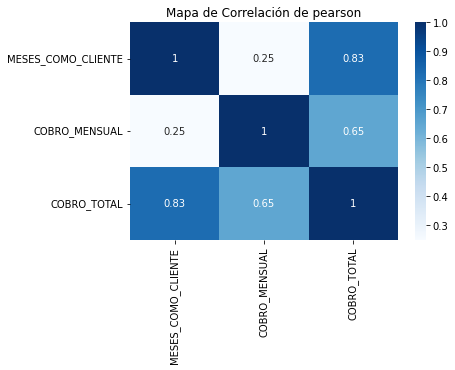

In [117]:
# Mapa de correlacion variables cualitativas
correlacion_pearson = DF.corr()
correlacion_pearson
sns.heatmap(correlacion_pearson, xticklabels=correlacion_pearson.columns.values, yticklabels=correlacion_pearson.columns.values,  cmap="Blues", annot = True)
plt.title("Mapa de Correlación de pearson")
plt.show()

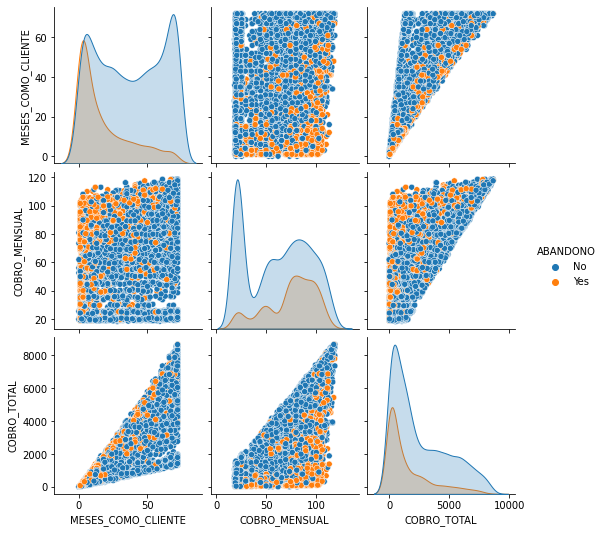

In [118]:
#  Analisis bivariado 
comportamiento = DF[["MESES_COMO_CLIENTE", "COBRO_MENSUAL", "COBRO_TOTAL", "ABANDONO"]]
sns.pairplot(comportamiento, hue='ABANDONO')

- Se observa que entre menor tiempo tiene el cliente como cliente en la compañía mayor es la probabilidad de abandono. Por su parte, existe una importante correlación positiva entre los meses que llevan los usuarios como clientes de la compañía y el cobro total realizado a los mismos. En donde a mayor tiempo en la compañía mayor será el cobro total realizado.
 
- Por su parte entre mayor es el cobro mensual efectuado por el cliente la probabilidad de que el cliente abandone la compañía aumenta. 

-  No existe una correlación significativa entre los meses que el cliente lleva en la compañía con el cobro que se le realiza de forma mensual. 

- Los clientes con un cobro total mas bajo tienen mayor probabilidad de fuga, existe una correlación positiva entre el cobro mensual y el cobro total, en donde entre mayor es el importe mensual que debe pagar el cliente mayor es la probabilidad que el cobro total que recaude la compañía aumente. 


# RELACIONES JERARQUICAS

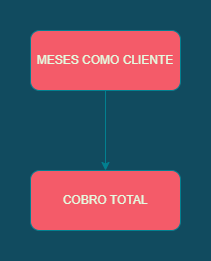

>> Existe una relación jerárquica entre la variable meses como cliente y cobro total , toda vez que si el cliente tiene menos de un mes como cliente no existirá cobro total efectuado al cliente. 

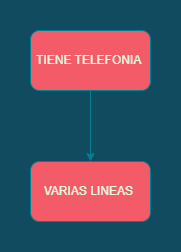

>> Existe una relación jerárquica entre si el cliente tiene servicio de telefonía y si el cliente tiene varias líneas, ningún cliente sin servicio telefónico podrá tener varias líneas. 

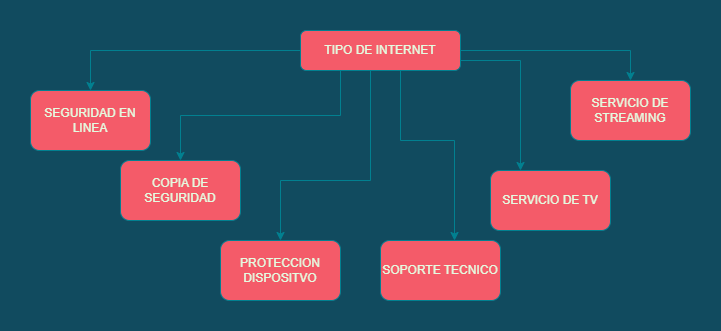

>> Los servicios de seguridad en línea – copia de seguridad – protección del dispositivo – soporte técnico – servicio de tv y servicios de streaming son servicios que dependen de que el cliente tenga activo servicios de internet con la compañía, por lo tanto un cliente que en la variable tipo de internet tenga la categoría no, no puede tener ninguno de estos servicios activos. 

## VERIFICACION DE LAS REGLAS JERARQUICAS

In [119]:
# Regla 1 si meses_como_cliente < 1 ENTONCES cobro total == 0 
jerarquia = pd.crosstab(index=[DF["MESES_COMO_CLIENTE"] < 1], columns= DF["COBRO_TOTAL"] ==0.0,
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True, 
                        rownames = ["Tiene mmenos de 1 mes"], colnames = ["no se le hizo cobro"])
jerarquia

no se le hizo cobro,False,True,All
Tiene mmenos de 1 mes,,,
False,7032.0,NaN,7032
True,NaN,11.0,11
All,7032.0,11.0,7043


>> Observamos que los datos guardan validez respecto a esta regla jerárquica, no existe ningún cliente que tenga menos de un mes en la compañía al cual se le haya ejecutado algún cobro

In [120]:
# Regla 2 -> si tiene_telefonia == no ENTONCES varias_lineas == no phone service
jerarquia1 = pd.crosstab(index=[DF["TIENE_TELEFONIA"]], columns= DF["VARIAS_LINEAS"],
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True)
jerarquia1

VARIAS_LINEAS,No,No phone service,Yes,All
TIENE_TELEFONIA,,,,
No,NaN,682.0,NaN,682
Yes,3390.0,NaN,2971.0,6361
All,3390.0,682.0,2971.0,7043


>> La regla jerárquica se cumple, ya que, los 682 clientes que no tienen servicio de telefonía con la compañía registran en la categoría no phone service en la variable varias líneas. 

In [121]:
# Regla 3 -> SI TIPO_INTERNET == No ENTONCES SEGURIDAD EN LINEA == No internet service
jerarquia2 = pd.crosstab(index=[DF["TIPO_INTERNET"]], columns= DF["SEGURIDAD_EN_LINEA"],
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True)
jerarquia2

SEGURIDAD_EN_LINEA,No,No internet service,Yes,All
TIPO_INTERNET,,,,
DSL,1241.0,NaN,1180.0,2421
Fiber optic,2257.0,NaN,839.0,3096
No,NaN,1526.0,NaN,1526
All,3498.0,1526.0,2019.0,7043


>> Se cumple la regla jerárquica no existe ningún cliente sin servicio a internet que posea el servicio de seguridad en línea 

In [122]:
# Regla 4 -> SI TIPO_INTERNET == No entonces copia de seguridad == No internet service
jerarquia3 = pd.crosstab(index=[DF["TIPO_INTERNET"]], columns= DF["COPIA_DE_SEGURIDAD"],
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True)
jerarquia3

COPIA_DE_SEGURIDAD,No,No internet service,Yes,All
TIPO_INTERNET,,,,
DSL,1335.0,NaN,1086.0,2421
Fiber optic,1753.0,NaN,1343.0,3096
No,NaN,1526.0,NaN,1526
All,3088.0,1526.0,2429.0,7043


>> Se cumple la regla jerárquica no existe ningún cliente sin servicio a internet que posea el servicio de copia de seguridad 

In [123]:
# Regla 5 -> SI TIPO_INTERNET == No entonces Proteccion_dispositivo ==No internet Service 
jerarquia4 = pd.crosstab(index=[DF["TIPO_INTERNET"]], columns= DF["PROTECCION_DISPOSITIVO"],
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True)
jerarquia4

PROTECCION_DISPOSITIVO,No,No internet service,Yes,All
TIPO_INTERNET,,,,
DSL,1356.0,NaN,1065.0,2421
Fiber optic,1739.0,NaN,1357.0,3096
No,NaN,1526.0,NaN,1526
All,3095.0,1526.0,2422.0,7043


>> Se cumple la regla jerárquica no existe ningún cliente sin servicio a internet que posea el servicio de protección del dispositivo  

In [124]:
# Regla 6 -> SI TIPO_INTERNET == No entonces soporte tecnico ==No internet Service 
jerarquia5 = pd.crosstab(index=[DF["TIPO_INTERNET"]], columns= DF["SOPORTE_TECNICO"],
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True)
jerarquia5

SOPORTE_TECNICO,No,No internet service,Yes,All
TIPO_INTERNET,,,,
DSL,1243.0,NaN,1178.0,2421
Fiber optic,2230.0,NaN,866.0,3096
No,NaN,1526.0,NaN,1526
All,3473.0,1526.0,2044.0,7043


>> Se cumple la regla jerárquica no existe ningún cliente sin servicio a internet que posea el servicio de soporte tecnico 

In [125]:
# Regla 7 -> SI TIPO_INTERNET == No entonces SERVICIO_TV ==No internet Service 
jerarquia6 = pd.crosstab(index=[DF["TIPO_INTERNET"]], columns= DF["SERVICIO_TV"],
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True)
jerarquia6

SERVICIO_TV,No,No internet service,Yes,All
TIPO_INTERNET,,,,
DSL,1464.0,NaN,957.0,2421
Fiber optic,1346.0,NaN,1750.0,3096
No,NaN,1526.0,NaN,1526
All,2810.0,1526.0,2707.0,7043


>> Se cumple la regla jerárquica no existe ningún cliente sin servicio a internet que posea el servicio de servicio de tv 

In [43]:
# Regla 8 -> SI TIPO_INTERNET == No entonces SERVICIOS_STREAMING ==No internet Service 
jerarquia6 = pd.crosstab(index=[DF["TIPO_INTERNET"]], columns= DF["SERVICIOS_STREAMING"],
                        values = DF["ID_CLIENTE"], aggfunc="count", margins=True)
jerarquia6

SERVICIOS_STREAMING,No,No internet service,Yes,All
TIPO_INTERNET,,,,
DSL,1440.0,NaN,981.0,2421
Fiber optic,1345.0,NaN,1751.0,3096
No,NaN,1526.0,NaN,1526
All,2785.0,1526.0,2732.0,7043


>> Se cumple la regla jerárquica no existe ningún cliente sin servicio a internet que posea el servicio de streaming

In [127]:
my_report = sweetviz.analyze(DF)
my_report.show_html("DescripcionDatos.html")

                                             |          | [  0%]   00:00 -> (? left)

Report DescripcionDatos.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [132]:
DF.to_csv("Data_limpia.csv")